In [13]:
import numpy as np, matplotlib.pyplot as plt, scipy.constants as sc

In [14]:
#here we import maxwell which will be used to plot a curve from the histogram of velocities and then we will be using quad to integrate said curve
from scipy.stats import maxwell, skew
from scipy.integrate import quad

two classes are used here so that one class doesn't become cumbersome to edit

In [15]:
#here we will be using as few functions as possible while being reasonable to increase usability
class MB_dist:
    def __init__(self, T, m, v_x=0, v_y=0, v_z=0, v=0,N=1000):
        """initialising variables and sortting list of velocities"""
        rng = np.random.default_rng()
        self.N = N
        v_x = rng.normal(loc=0, scale=sc.k*T/m, size=N)
        v_y = rng.normal(loc=0, scale=sc.k*T/m, size=N)
        v_z = rng.normal(loc=0, scale=sc.k*T/m, size=N)
        v = np.sqrt(v_x**2 + v_y**2 + v_z**2)
        self.m = m
        self.T = T
        self.v = v
        self.v_x = v_x
        self.v_y = v_y
        self.v_z = v_z
        
        #[4]
        #basic bubble sort to order the velocities done to make the calculation of the curve possible
        n = len(v)
        for i in range(n-1):
            for j in range(0, n-i-1):
                if v[j]>v[j + 1]:
                    v[j], v[j+1] = v[j+1], v[j]

    def __repr__(self):
        """returns the varables associated values"""
        #I have chosen to use ranges to denote the velocities here as otherwise it would be unreasonable to show with all the values for each array of velocities
        return f'MB_dist(m={self.m}, T={self.T}, v_x={np.max(self.v_x)-np.min(self.v_x)}, v_y={np.max(self.v_y)-np.min(self.v_y)}, v_z={np.max(self.v_z)-np.min(self.v_z)}, v={np.max(self.v)-np.min(self.v)})'

    def plots(self,ques):
        """plots graphs of the histograms for each of the velocities and the maxwell-boltzmann distribution"""

        if ques == 1:

            #requires no normalisation as rng will functionally do this.
            fig, (ax, ay, az) = plt.subplots(3, sharex=True)

            counts, bins, patches = ax.hist(self.v_x, bins=20)
            ax.set(xlabel="velocity in the x direction (m/s)", ylabel="Count")

            counts, bins, patches = ay.hist(self.v_y, bins=20)
            ay.set(xlabel="velocity in the y direction (m/s)", ylabel="Count")

            counts, bins, patches = az.hist(self.v_z, bins=20)
            az.set(xlabel="velocity in the z direction (m/s)", ylabel="Count")
            plt.show()

        elif ques == 2:
            fig, ax = plt.subplots()
            counts, bins, patches = ax.hist(self.v, bins=20)
            ax.set(xlabel="Speed (m/s)", ylabel="Count")
            plt.show()

        elif ques == 3:
            #the following code will ....
            fig, ax = plt.subplots()
            speed_bins = np.linspace(np.min(self.v), np.max(self.v), 100)
            #setting density to true will normalise the curve
            counts, bins, patches = ax.hist(self.v, bins=speed_bins, density=True)
            #[2]
            params = maxwell.fit(self.v)
            # Plot Maxwell-Boltzmann distribution curve
            plt.plot(self.v, maxwell.pdf(self.v, *params), 'r-', lw=2, label='Normalied Maxwell-Boltzmann Distribution')
            ax.set_title('Maxwell-Boltzmann Distribution')
            ax.set_xlabel('Speed (m/s)')
            ax.set_ylabel('Probability Density')
            ax.legend()
            plt.show()
        else:
            print(f"you gave {ques} for the input which isn't recognised as a valid option")
            return False
        
    def skew_check(self,ques):
        """will check the skew of the histogram and return it to the user and explain the significance"""
        #[1]
        if ques==1:
            if skew(self.v)<0:
                return f"this tells us there is negative skewness, as the values gained was {skew(self.v)}"
            elif skew(self.v)>0:
                return f"this tells us there is positive skewness, as the values gained was {skew(self.v)}"
            else:
                return f"no skewness as value was {skew(self.v)}"
        elif ques==2:
            if skew(self.v_x)<0:
                return f"this tells us there is negative skewness, as the values gained was {skew(self.v_x)}"
            elif skew(self.v)>0:
                return f"this tells us there is positive skewness, as the values gained was {skew(self.v_x)}"
            else:
                return f"no skewness as value was {skew(self.v_x)}"
        elif ques==3:
            if skew(self.v_y)<0:
                return f"this tells us there is negative skewness, as the values gained was {skew(self.v_y)}"
            elif skew(self.v)>0:
                return f"this tells us there is positive skewness, as the values gained was {skew(self.v_y)}"
            else:
                return f"no skewness as value was {skew(self.v_y)}"
        elif ques==4:
            if skew(self.v_z)<0:
                return f"this tells us there is negative skewness, as the values gained was {skew(self.v_z)}"
            elif skew(self.v)>0:
                return f"this tells us there is positive skewness, as the values gained was {skew(self.v_z)}"
            else:
                return f"no skewness as value was {skew(self.v_z)}"

    def v_chance(self, v_lower, v_upper):
        """integrates the curve given by the maxwell distribution"""
        if v_lower > np.min(self.v) or v_upper < np.max(self.v):
            I, sigma = quad(maxwell.pdf, v_lower, v_upper, args=())
            return f"the values gained was {I} plus or minus {sigma}"
        else:
            return "Bounds not acceptable"


In [16]:
class therm(MB_dist):
    
    def __init__(self,temp,mass,r,V=10):
        """initalizes variables"""
        self.r=r
        self.V=V
        super().__init__(m=mass,T=temp,v=0,v_x=0,v_y=0,v_z=0)

    def mean(self):
        """"calculates the mean velocity of the particles"""
        mean = np.sqrt(8 * sc.k * self.T / (self.m * np.pi))
        print(f"the mean value for velocity was found to be {mean}m/s")
        return mean

    def median(self):
        """calculates the modal velocity of the particles"""
        mode = np.sqrt(2 * sc.k * self.T / self.m)
        print(f"the most probable value for velocity was found to be {mode}m/s")
        return mode

    def rms(self):
        """calculates the root mean square velocity of the particles"""
        rms = np.sqrt(3 * sc.k * self.T / self.m)
        print(f"the root mean squared value for velocity was found to be {rms}m/s")
        return rms
    
    def collisions(self,ques):
        """"calculates and returns to the user the mean time between collistions and the rate of collistion"""
        if ques=="1":
            return f"the average Collisions per unit time is {4*np.pi*np.sqrt(2)*self.r**2*self.mean*self.N/self.V} seconds"
        elif ques=="2":
            return f"the average time between collitions is {(4*np.pi*np.sqrt(2)*self.r**2*self.mean*self.N/self.V)**-1} seconds"
        else:
            return "inputted option is invalid"

In [17]:
first=MB_dist(300,1.67e-27)
second=therm(300,1.67e-27,10e-10)

In [18]:
first.__repr__()

'MB_dist(m=1.67e-27, T=300, v_x=14773982.128878508, v_y=17398727.026580498, v_z=15277739.152317911, v=11283703.344067786)'

the rms value for the velocities here can be calculated using the maxwell-boltzmann distribution by the equation:

$${√(3𝑘_B𝑇/𝑚)}$$

In [19]:
second.rms()

the root mean squared value for velocity was found to be 2727.750603206498m/s


2727.750603206498

the most probable velocity or better known as the mode can be calculated in the following way:
$${√(2𝑘_B𝑇/m)}$$

In [20]:
second.median()

the most probable value for velocity was found to be 2227.1990411416477m/s


2227.1990411416477

to calculate the average speed we must integrate to infinity as shown:

$${< v > = ∫_0^∞vf(v)dv}$$

which through derivations provides the following equation:
$${√(8k_BT/(𝜋𝑚))}$$

In [21]:
second.mean()

the mean value for velocity was found to be 2513.1249989993366m/s


2513.1249989993366

checking the skewness of our graphs

In [22]:
first.skew_check(1)

'this tells us there is positive skewness, as the values gained was 0.47006061969937096'

where we can see the normalised plots

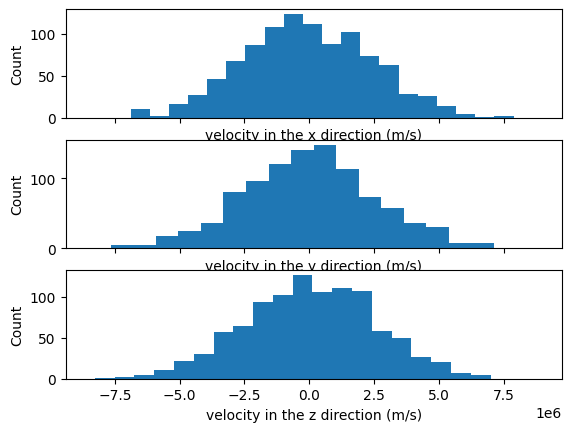

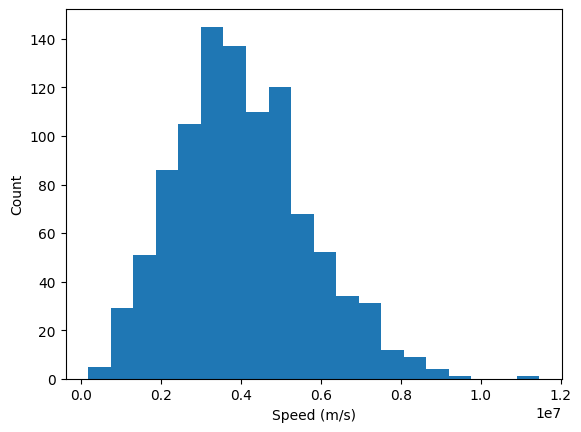

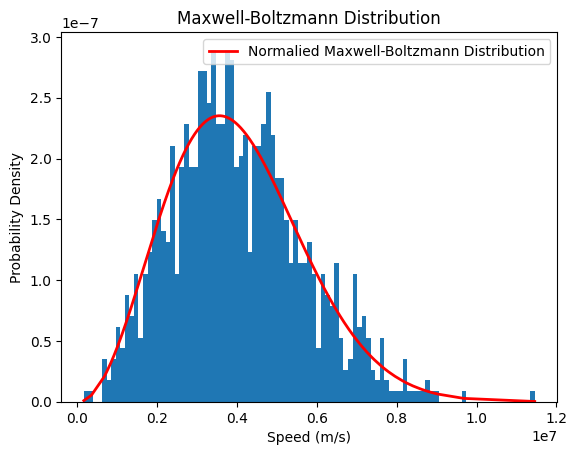

In [23]:
#component velocities
first.plots(1)

#velocities
first.plots(2)

#maxwell-boltzmann distribution
first.plots(3)

to calculate the chance of a particle having a given range of velocities is given via integration

In [24]:
#this value shows it's normalised as the area under is ~1
first.v_chance(0,10)

'the values gained was 0.9999999999999999 plus or minus 7.348032945997396e-10'

Sources:

skewness as a concept - https://www.youtube.com/watch?v=U0NZu6f5TMI [1]

maxwell distribution in python - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.maxwell.html [2]

skewness in python - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html [3]

bubble sort - https://www.geeksforgeeks.org/python-program-for-bubble-sort/ [4]